In [1]:
!pip install prophet

In [2]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Date,Gold Price in INR
0,01-01-2016,2252.6
1,04-01-2016,2299.8
2,05-01-2016,2301.3
3,06-01-2016,2329.8
4,07-01-2016,2369.5


In [5]:
df.tail()

,Date,Gold Price in INR
2482,20-06-2023,5097.2
2483,21-06-2023,5084.6
2484,22-06-2023,5033.6
2485,23-06-2023,5050.9
2486,24-06-2023,5051.7


In [6]:
df.describe()

,Gold Price in INR
count,2487.000000
mean,3664.081423
std,865.873943
min,2252.600000
25%,2787.900000
50%,3596.100000
75%,4402.000000
max,5379.700000


In [7]:
df.shape

(2487, 2)

In [8]:
Date = df['Date']
Gold_Price_INR = df['Gold Price in INR']
df['Year'] = pd.to_datetime(df['Date']).dt.year

<ipython-input-8-35e3f7414176>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Year'] = pd.to_datetime(df['Date']).dt.year


<ipython-input-9-0435e29ad239>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


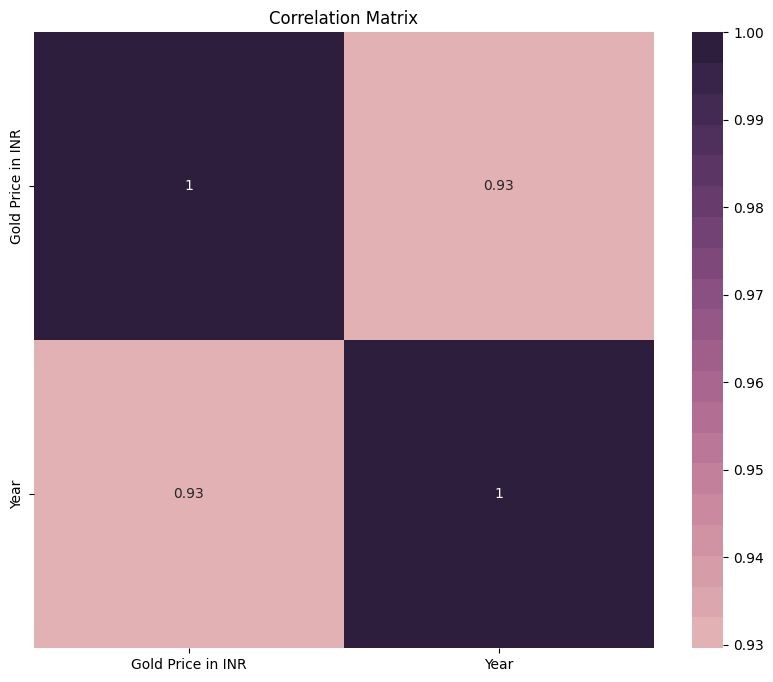

In [9]:
import seaborn as sns
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(20, light=0.75, dark=0.15))

# Set the title of the heatmap
plt.title('Correlation Matrix')

# Show the plot
plt.show()

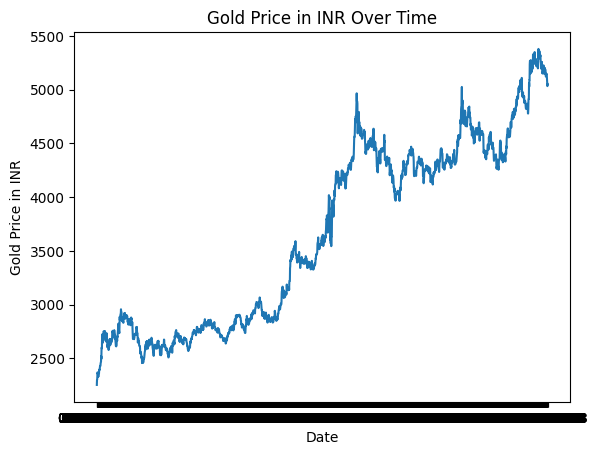

In [10]:
plt.plot(Date, Gold_Price_INR)

# Customize the graph if needed (e.g., labels, title, etc.)
plt.xlabel('Date')
plt.ylabel('Gold Price in INR')
plt.title('Gold Price in INR Over Time')

# Display the graph
plt.show()

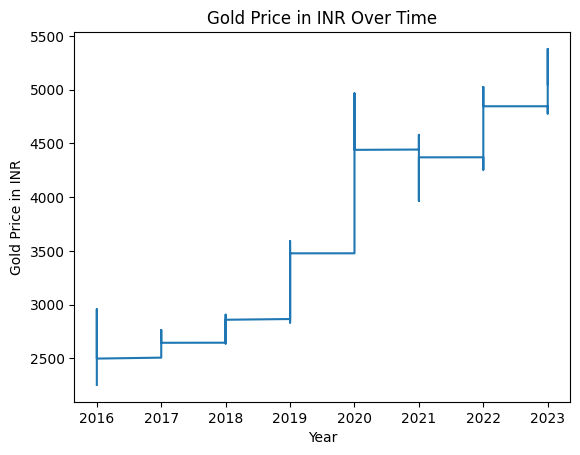

In [11]:
plt.plot(df['Year'], df['Gold Price in INR'])

plt.xlabel('Year')
plt.ylabel('Gold Price in INR')
plt.title('Gold Price in INR Over Time')

plt.show()

In [12]:
# Rename the columns to 'ds' and 'y' for Prophet
df = df.rename(columns={'Date': 'ds', 'Gold Price in INR': 'y'})

In [13]:
model = Prophet()
model.fit(df)

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1124: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:271: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcwbqv_ta/3xkh9t5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcwbqv_ta/69mx6fms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.

In [14]:
future_dates = model.make_future_dataframe(periods=365)  # Adjust the number of periods as needed

In [15]:
predictions = model.predict(future_dates)

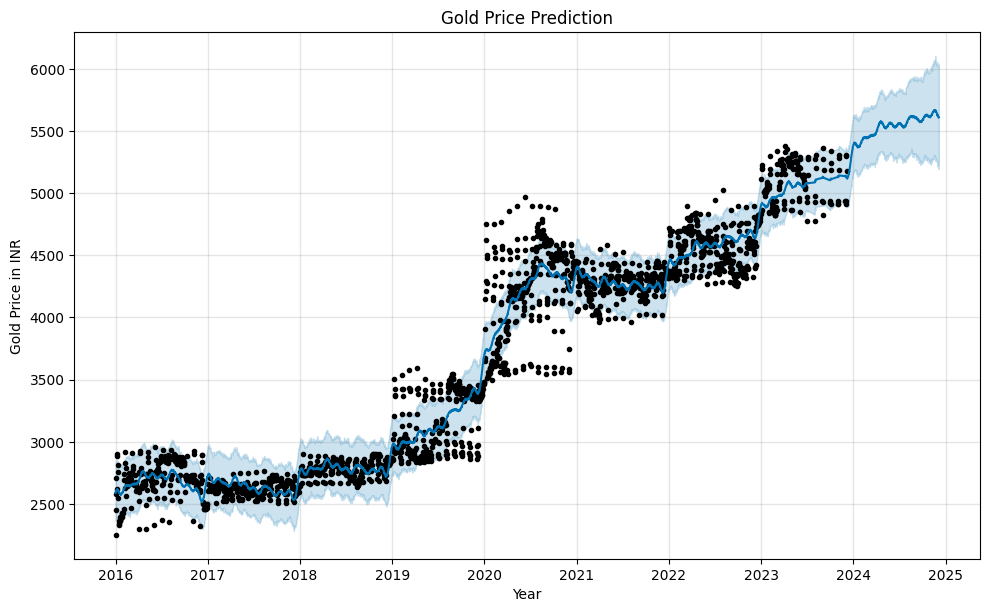

In [16]:
model.plot(predictions)
plt.xlabel('Year')
plt.ylabel('Gold Price in INR')
plt.title('Gold Price Prediction')
plt.show()

####Evaluation


In [17]:
actual_values = df['y'].values
predicted_values = predictions['yhat'].values[:len(df)]

In [18]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actual_values, predicted_values)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 104.67360032188063
